Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

Data ETL

In [98]:
housing = fetch_california_housing()

In [99]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [100]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [101]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y  = pd.DataFrame(housing.target, columns=housing.target_names)

In [102]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [104]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [105]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [106]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [107]:
for col in X.columns:
    print(col,': ',sum(X[col].isna()))
X.dropna(inplace=True)

MedInc :  0
HouseAge :  0
AveRooms :  0
AveBedrms :  0
Population :  0
AveOccup :  0
Latitude :  0
Longitude :  0


<Axes: >

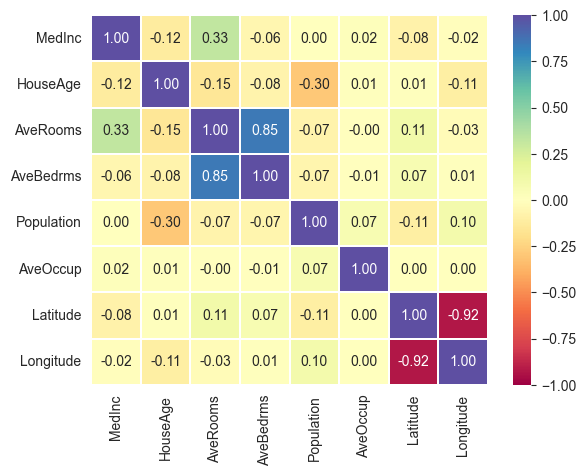

In [108]:
sns.heatmap(X.corr(), annot = True, cmap='Spectral',linewidths = 0.1,vmin=-1, vmax=1,  mask=False, fmt=".2f")

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

neg_mean_absolute_error - smaller is better

In [110]:
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)

In [111]:
pipe_linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear', LinearRegression(fit_intercept=True))
])

model_linear_scores = cross_val_score(pipe_linear, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_linear_scores

array([-0.53286851, -0.52878709, -0.53770585, -0.52744413, -0.5316177 ,
       -0.51838361, -0.54599058, -0.54441511, -0.52572175, -0.52433106,
       -0.53594667, -0.5264349 , -0.52975192, -0.53645394, -0.52883193,
       -0.52756796, -0.53376565, -0.54080917, -0.52410467, -0.5328948 ,
       -0.53331152, -0.54714239, -0.52155503, -0.53514727, -0.53577333])

In [112]:
pipe_polynomial_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=True))
])
model_polynomial_2_scores = cross_val_score(pipe_polynomial_2, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_polynomial_2_scores

array([-0.46068688, -0.46520339, -0.48962711, -0.53463121, -0.46972893,
       -0.45852361, -0.50734409, -0.55725589, -0.45461183, -0.45874716,
       -0.48855883, -0.46910137, -0.46268312, -0.4657843 , -0.53521965,
       -0.46827252, -0.65348789, -0.48126515, -0.45291146, -0.47421852,
       -0.46808185, -0.73837247, -0.46453799, -0.47494396, -0.46972059])

In [113]:
pipe_polynomial_3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression(fit_intercept=True))
])

model_polynomial_3_scores = cross_val_score(pipe_polynomial_3, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_polynomial_3_scores

array([ -0.43898509,  -0.43383643,  -4.96770873,  -2.90293073,
        -0.50803149,  -0.46913174,  -8.78574421, -10.64055889,
        -0.45323452,  -0.42929982,  -9.78276254,  -0.56842006,
        -0.58282891,  -0.44261345,  -5.5964978 ,  -0.54441894,
       -36.88121315,  -0.49594142,  -0.4197394 ,  -1.85803342,
        -0.43634699, -68.20095243,  -0.68829822,  -0.48698693,
        -0.4936254 ])

In [114]:
from sklearn.neighbors import KNeighborsRegressor
pipe_kneighbors_reg_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear',KNeighborsRegressor(n_neighbors=2))
])

model_kneighbors_reg_2_scores = cross_val_score(pipe_kneighbors_reg_2, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_kneighbors_reg_2_scores

array([-0.44136265, -0.46243061, -0.45658267, -0.44917899, -0.45425508,
       -0.45677483, -0.45872047, -0.46302184, -0.44145871, -0.45367819,
       -0.44909109, -0.44594123, -0.45359281, -0.45104376, -0.46145192,
       -0.4500462 , -0.45163652, -0.45742277, -0.44492791, -0.45453927,
       -0.44686377, -0.44120639, -0.43312114, -0.46954411, -0.45564172])

In [115]:
from sklearn.neighbors import KNeighborsRegressor
pipe_kneighbors_reg_3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('reg',KNeighborsRegressor(n_neighbors=3))
])

model_kneighbors_reg_3_scores = cross_val_score(pipe_kneighbors_reg_3, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_kneighbors_reg_3_scores

array([-0.42692502, -0.44149529, -0.44077278, -0.4316054 , -0.4301738 ,
       -0.43659699, -0.43983906, -0.44775968, -0.42154395, -0.43134162,
       -0.42948226, -0.42915988, -0.43295089, -0.43644656, -0.43963684,
       -0.42809042, -0.43821256, -0.43745839, -0.43317832, -0.43736811,
       -0.43361674, -0.4300787 , -0.42355601, -0.44543051, -0.43514489])

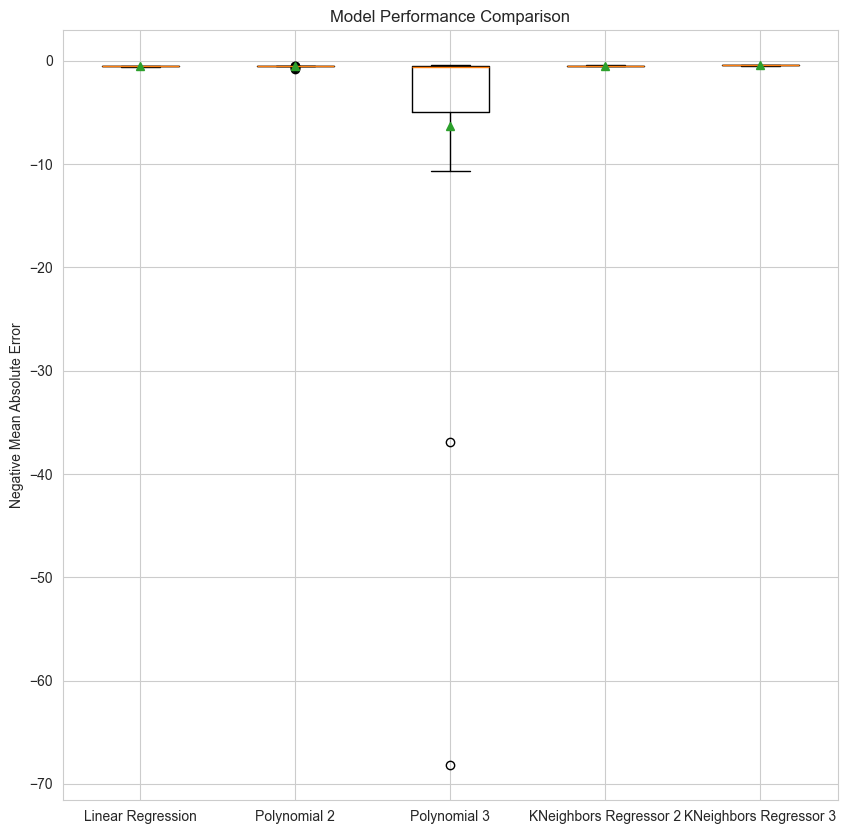

In [119]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores, model_polynomial_2_scores,model_polynomial_3_scores, model_kneighbors_reg_2_scores, model_kneighbors_reg_3_scores], labels=['Linear Regression', 'Polynomial 2', 'Polynomial 3', 'KNeighbors Regressor 2', 'KNeighbors Regressor 3'], showmeans=True)
plt.title('Model Performance Comparison')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

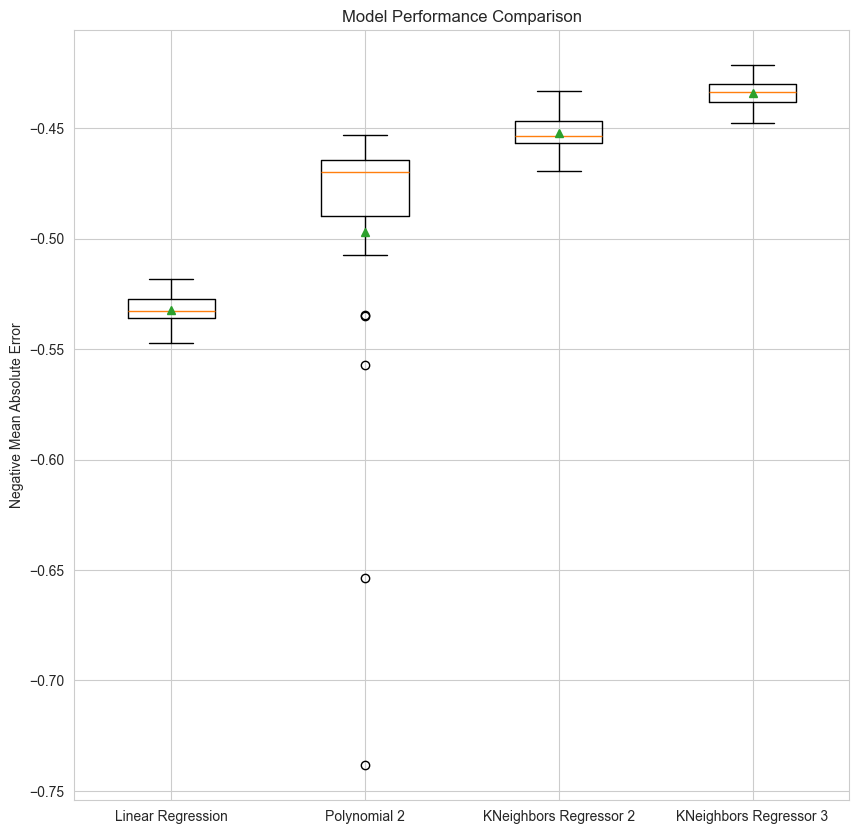

In [117]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores, model_polynomial_2_scores, model_kneighbors_reg_2_scores, model_kneighbors_reg_3_scores], labels=['Linear Regression', 'Polynomial 2', 'KNeighbors Regressor 2', 'KNeighbors Regressor 3'], showmeans=True)
plt.title('Model Performance Comparison')
plt.ylabel('Negative Mean Absolute Error')
plt.show()